# Modeling and Predicting

1. Linear Regression

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC

from sklearn.metrics import make_scorer, accuracy_score, roc_auc_score 
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split


from sklearn import metrics
from sklearn.metrics import r2_score

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [3]:
data = pd.read_csv('/Users/jaimesastrecrespo/Desktop/tracks_clean_kaggle.csv')

In [4]:
data = pd.get_dummies(data, columns=['time_signature', 'key', 'mode'], drop_first=True)

In [5]:
data.head()

,Unnamed: 0,id,name,popularity,explicit,artists,id_artists,release_date,danceability,energy,...,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_1
0,0,35iwgR4jXetI318WEWsa1Q,Carve,6,0,Uli,['45tIt06XoI0Iio4LBEVpls'],1922-02-22,0.645,0.4450,...,0,0,0,0,0,0,0,0,0,1
1,1,021ht4sdgPcrDgSk7JTbKY,Capítulo 2.16 - Banquero Anarquista,0,0,Fernando Pessoa,['14jtPCOoNZwquk5wd9DxrY'],1922-06-01,0.695,0.2630,...,0,0,0,0,0,0,0,0,0,1
2,2,07A5yehtSnoedViJAZkNnc,Vivo para Quererte - Remasterizado,0,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.434,0.1770,...,0,0,0,0,0,0,0,0,0,1
3,3,08FmqUhxtyLTn6pAh6bk45,El Prisionero - Remasterizado,0,0,Ignacio Corsini,['5LiOoJbxVSAMkBS2fUm3X2'],1922-03-21,0.321,0.0946,...,0,0,0,0,1,0,0,0,0,1
4,4,08y9GfoqCWfOGsKdwojr5e,Lady of the Evening,0,0,Dick Haymes,['3BiJGZsyX9sJchTqcSA7Su'],1922,0.402,0.1580,...,1,0,0,0,0,0,0,0,0,0


In [6]:
data.columns

Index(['Unnamed: 0', 'id', 'name', 'popularity', 'explicit', 'artists',
       'id_artists', 'release_date', 'danceability', 'energy', 'loudness',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration', 'artists_count', 'year', 'Song_decade',
       'time_signature_1', 'time_signature_3', 'time_signature_4',
       'time_signature_5', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5',
       'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'mode_1'],
      dtype='object')

In [7]:

features = ["acousticness", "danceability", "duration", "energy", "instrumentalness", "key_1", "key_2", "key_3", "key_4", "key_5", "key_6", "key_7", "key_8", "key_9", "key_10", "key_11", "liveness", 
            "mode_1", "speechiness", "loudness", "tempo", "time_signature_1", "time_signature_3", "time_signature_4", "time_signature_5", "valence"]


* Set the variables:

In [8]:
X = data[features]
y = data['popularity']

# Model 1: Linear Regression

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
X_train, X_test, y_train, y_test = train_test_split(X[features], y, train_size=0.8, random_state=8)

In [10]:
lr = LinearRegression()
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

0.21236056226277844

This prints out our coefficient of determination, R², of .213. While we did already beat our baseline, generally speaking, this is a dangerously low R².

In [11]:
y_pred = lr.predict(X_test)

In [12]:
print(metrics.mean_absolute_error(y_test, y_pred))
print(metrics.mean_squared_error(y_test, y_pred))
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

13.170218552815586
264.09726996435506
16.25106980984191


* As is standard protocol, we use RMSE as the primary metric to evaluate our linear regression model. An average of 16.32 spread for our residuals in the prediction model for a range of 0–100 in ‘popularity’ is huge.
* And with R² value of .213, we haven’t even beat our base correlation.


# Model 2: Decision Tree

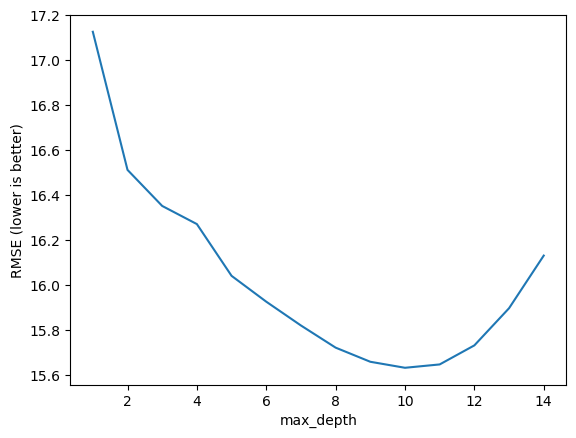

In [13]:
from sklearn.tree import DecisionTreeRegressor
max_depth_range = range(1, 15)
RMSE_scores = []
from sklearn.model_selection import cross_val_score
for depth in max_depth_range:
    treereg = DecisionTreeRegressor(max_depth=depth, random_state=1)
    MSE_scores = cross_val_score(treereg, X, y, cv=5, scoring='neg_mean_squared_error')
    RMSE_scores.append(np.mean(np.sqrt(-MSE_scores)))
plt.plot(max_depth_range, RMSE_scores);
plt.xlabel('max_depth');
plt.ylabel('RMSE (lower is better)');

In [14]:
sorted(zip(RMSE_scores, max_depth_range))[0]

(15.631007792015254, 10)

In [15]:
treereg = DecisionTreeRegressor(max_depth=10, random_state=1)
treereg.fit(X, y)

DecisionTreeRegressor(max_depth=10, random_state=1)

In [16]:
# Computing feature importances.
pd.DataFrame({'feature':features, 'importance':treereg.feature_importances_}).sort_values(by='importance', ascending=False)

,feature,importance
0,acousticness,0.489102
19,loudness,0.182704
2,duration,0.069242
4,instrumentalness,0.068481
25,valence,0.066672
1,danceability,0.048831
18,speechiness,0.039790
3,energy,0.011918
16,liveness,0.011843
20,tempo,0.010848


Even with just a small range of (1, 15), we managed to get a better RMSE of 15.64 using a max_depth_range of 10. Better, but given the nature of decision trees, we naturally engaged in some gross overfitting for a minor gain in the standard deviation of our prediction errors.

# 3. random forest:

In [17]:
from sklearn.ensemble import RandomForestRegressor

In [18]:
rfreg = RandomForestRegressor(n_estimators=150,
                              max_features=5,
                              oob_score=True,
                              random_state=1)
rfreg.fit(X, y)

RandomForestRegressor(max_features=5, n_estimators=150, oob_score=True,
                      random_state=1)

In [19]:
pd.DataFrame({'feature':features,
              'importance':rfreg.feature_importances_}).sort_values(by='importance', ascending=False)

,feature,importance
0,acousticness,0.158778
19,loudness,0.126505
3,energy,0.097968
2,duration,0.090816
25,valence,0.081387
1,danceability,0.081086
18,speechiness,0.078348
4,instrumentalness,0.075191
20,tempo,0.068596
16,liveness,0.066104


In [20]:
print((rfreg.oob_score_))

0.356137526210334


### Regression analysis is not getting us too far. Time to try a classification approach:

In [23]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [24]:
pd.cut(data['popularity'], bins=3)

0           (-0.1, 33.333]
1           (-0.1, 33.333]
2           (-0.1, 33.333]
3           (-0.1, 33.333]
4           (-0.1, 33.333]
                ...       
526598    (33.333, 66.667]
526599     (66.667, 100.0]
526600     (66.667, 100.0]
526601    (33.333, 66.667]
526602    (33.333, 66.667]
Name: popularity, Length: 526603, dtype: category
Categories (3, interval[float64, right]): [(-0.1, 33.333] < (33.333, 66.667] < (66.667, 100.0]]

In [25]:
pd.cut(data['popularity'], bins=3, labels = ["low", "medium", "high"]).value_counts()

low       327246
medium    189094
high       10263
Name: popularity, dtype: int64

In [26]:
data['popularity'] = pd.cut(data.popularity, bins=3, labels = ["low", "medium", "high"], right = True)


In [27]:
data.loc[data['popularity']== 'high']

,Unnamed: 0,id,name,popularity,explicit,artists,id_artists,release_date,danceability,energy,...,key_3,key_4,key_5,key_6,key_7,key_8,key_9,key_10,key_11,mode_1
21217,22549,5NGtFXVpXSvwunEIGeviY3,Gymnopédie No. 1,high,0,"Erik Satie, Philippe Entremont","['459INk8vcC0ebEef82WjIK', '4x2fCu6MNErew0pb64...",1949,0.469,0.0128,...,0,0,0,0,1,0,0,0,0,1
25972,27499,648TTtYB0bH0P8Hfy0FmkL,Unforgettable,high,0,Nat King Cole,['7v4imS0moSyGdXyLgVTIV7'],1954-01-01,0.349,0.1820,...,0,0,1,0,0,0,0,0,0,1
27879,29498,3aEJMh1cXKEjgh52claxQp,I've Got You Under My Skin - Remastered 1998,high,0,Frank Sinatra,['1Mxqyy3pSjf8kZZL4QVxS0'],1956-03,0.585,0.2470,...,0,0,0,0,0,0,0,0,0,1
27880,29499,1pZn8AX1WulW8IO338hE5D,Blue Moon,high,0,Billie Holiday,['1YzCsTRb22dQkh9lghPIrp'],1956-01-01,0.639,0.2690,...,0,0,0,0,0,1,0,0,0,1
28843,30498,78MI7mu1LV1k4IA2HzKmHe,Dream A Little Dream Of Me - Single Version,high,0,"Ella Fitzgerald, Louis Armstrong","['5V0MlUE1Bft0mbLlND7FJz', '19eLuQmk9aCobbVDHc...",1957-01-01,0.443,0.1040,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
526581,586650,1uviKYHZuM4uINK33F7sCt,Fix It to Break It,high,0,Clinton Kane,['7okSU80WTrn4LXlyXYbX3P'],2020-03-27,0.493,0.4610,...,0,0,0,0,0,0,0,0,0,1
526588,586657,1dKxf4Ht2SsKLyXfSDJAgy,The Cutest Puppy,high,0,Laureen Conrad,['7vgGpuiXdNlCmc994PlMlz'],2020-10-30,0.609,0.0172,...,0,0,0,0,0,1,0,0,0,1
526592,586661,27kcZEJvhkb1rzZS9gCpdA,remember the mornings,high,0,Clinton Kane,['7okSU80WTrn4LXlyXYbX3P'],2020-11-27,0.590,0.4430,...,0,0,0,0,0,0,0,0,0,1
526599,586668,0NuWgxEp51CutD2pJoF4OM,blind,high,0,ROLE MODEL,['1dy5WNgIKQU6ezkpZs4y8z'],2020-10-21,0.765,0.6630,...,0,0,0,0,0,0,0,0,0,1


In [28]:
y = data.popularity
y.value_counts()/y.count()


low       0.621428
medium    0.359083
high      0.019489
Name: popularity, dtype: float64

In [30]:

import numpy as np
import pandas as pd
pop_count = data.popularity.value_counts()

In [31]:
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler()
X_ros, y_ros = ros.fit_resample(X, y)

print('Removed indexes:')

print(X_ros.shape, y_ros.shape)

Removed indexes:
(981738, 26) (981738,)


In [32]:
y_ros.value_counts()

low       327246
medium    327246
high      327246
Name: popularity, dtype: int64

In [33]:
X_ros.value_counts()

acousticness  danceability  duration  energy  instrumentalness  key_1  key_2  key_3  key_4  key_5  key_6  key_7  key_8  key_9  key_10  key_11  liveness  mode_1  speechiness  loudness  tempo    time_signature_1  time_signature_3  time_signature_4  time_signature_5  valence
0.73500       0.481         335.0     0.262   0.0114            0      0      0      0      0      0      1      0      0      0       0       0.8320    1       0.0414       -15.730   122.883  0                 0                 1                 0                 0.375      81
0.00161       0.445         188.0     0.907   0.0000            0      0      0      0      0      0      0      0      0      0       1       0.4030    0       0.0773       -3.894    165.069  0                 0                 1                 0                 0.710      71
0.09020       0.376         177.0     0.430   0.0000            0      0      0      0      0      0      0      0      0      0       0       0.0912    0       0.0328  

inputting 4 features to set up design matrix

In [34]:

feature_cols = ['acousticness', 'instrumentalness', 'loudness', 'energy']
X = data[feature_cols]


In [35]:
X_ros.head()

,acousticness,danceability,duration,energy,instrumentalness,key_1,key_2,key_3,key_4,key_5,...,liveness,mode_1,speechiness,loudness,tempo,time_signature_1,time_signature_3,time_signature_4,time_signature_5,valence
0,0.674,0.645,127.0,0.4450,0.7440,0,0,0,0,0,...,0.151,1,0.4510,-13.338,104.851,0,1,0,0,0.127
1,0.797,0.695,98.0,0.2630,0.0000,0,0,0,0,0,...,0.148,1,0.9570,-22.136,102.009,1,0,0,0,0.655
2,0.994,0.434,182.0,0.1770,0.0218,1,0,0,0,0,...,0.212,1,0.0512,-21.180,130.418,0,0,0,1,0.457
3,0.995,0.321,177.0,0.0946,0.9180,0,0,0,0,0,...,0.104,1,0.0504,-27.961,169.980,0,1,0,0,0.397
4,0.989,0.402,163.0,0.1580,0.1300,0,0,1,0,0,...,0.311,0,0.0390,-16.900,103.220,0,0,1,0,0.196


In [36]:

X.head()

,acousticness,instrumentalness,loudness,energy
0,0.674,0.7440,-13.338,0.4450
1,0.797,0.0000,-22.136,0.2630
2,0.994,0.0218,-21.180,0.1770
3,0.995,0.9180,-27.961,0.0946
4,0.989,0.1300,-16.900,0.1580


In [37]:
print(X_ros.shape)
print(y_ros.shape)

(981738, 26)
(981738,)


In [38]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

knn.fit(X_ros, y_ros)


KNeighborsClassifier(n_neighbors=1)

evaluating model

In [39]:

y_pred_class = knn.predict(X_ros)

# compute classification accuracy
from sklearn import metrics

print(metrics.accuracy_score(y_ros, y_pred_class))


this is a paradigm shift in terms of accuracy from our regression analysis. 
A ~99% accuracy as compared to >19% during our regression analysis. 
Perhaps we are overfitting here, as this smells suspicious...

In [ ]:
#Let's creat a 50/50 train-test-split of our target/predictors. We'll refit KNN and check out the accuracy 

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, random_state=99, test_size=0.5)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_ros, y_ros, random_state=99, test_size=0.3)

knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

y_pred_class = knn.predict(X_test)
print(metrics.accuracy_score(y_test, y_pred_class))


In [ ]:

#Looks a bit more adjusted, but still significantly better than during regression analysis. 
#But let's dig further into assessing accuracy.
#We'll search for the best value for K below...

In [ ]:
k_range = range(1, 21)
# list of scores from k_range
k_scores = []
# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

In [ ]:
k_range = range(20, 27)
# list of scores from k_range
k_scores = []
# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)